# Experiment -I

---

# Stratosphere's Benign Dataset vs Our Benign Dataset Generated

---

### 1. Imports

In [1]:
import warnings
warnings.filterwarnings('ignore') 

In [2]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import random
import matplotlib.pyplot as plt #gráficos
import seaborn as sns

In [3]:
import joblib

In [4]:
from sklearn import preprocessing

---

---

### 2. Load Own Benign Dataset

In [5]:
b_research = pd.read_csv(r"C:\Users\Usuario\Documents\Github\PDG\PDG-2\Datasets\Time Window\Originals\Benigns\BenignTimeWindowsOurLab.csv", delimiter = ",")

In [6]:
b_research.head()

,Name,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,max_d,...,first_dp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type
0,19-csves/0.csv,649,UDP,TCP,NaN,0.0,1.2750,8.0870,12245.608,299.786,...,137,138,57621,1.0,3.0,7.0,58.0,209.0,912.0,Benign
1,19-csves/1.csv,678,UDP,TCP,NaN,0.0,1.3260,10.2180,17636.730,299.856,...,137,138,57621,1.0,3.0,8.0,58.0,228.0,1456.0,Benign
2,19-csves/2.csv,567,UDP,TCP,NaN,0.0,1.4380,16.3465,25171.533,285.001,...,137,443,138,1.0,3.0,6.0,58.0,166.0,375.0,Benign
3,19-csves/3.csv,401,UDP,TCP,NaN,0.0,0.0000,0.4100,503.453,31.028,...,53,5355,137,1.0,1.0,2.0,49.0,72.0,292.0,Benign
4,19-csves/4.csv,792,UDP,TCP,NaN,0.0,0.7815,2.6615,10706.867,298.947,...,137,138,57621,1.0,2.0,5.0,58.0,174.0,406.0,Benign


In [7]:
b_research.loc[b_research.Type == "Benign", ['Type']] = 'Own'

In [8]:
b_research.head(2)

,Name,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,max_d,...,first_dp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type
0,19-csves/0.csv,649,UDP,TCP,NaN,0.0,1.275,8.087,12245.608,299.786,...,137,138,57621,1.0,3.0,7.0,58.0,209.0,912.0,Own
1,19-csves/1.csv,678,UDP,TCP,NaN,0.0,1.326,10.218,17636.730,299.856,...,137,138,57621,1.0,3.0,8.0,58.0,228.0,1456.0,Own


---

### 3. Load Stratosphere Dataset

In [9]:
b_stratosphere = pd.read_csv(r"C:\Users\Usuario\Documents\Github\PDG\PDG-2\Datasets\Time Window\Originals\Benigns\BeningTimeWindowsStratosphere.csv", delimiter = ",")

In [10]:
b_stratosphere.head()

,Name,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,max_d,...,first_dp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type
0,1-csves/0.csv,7846,UDP,TCP,NaN,0.0,0.0,9.971,170718.308,291.654,...,53,80.0,443.0,1.0,1.0,8.0,52.0,210.0,494.0,Benign
1,1-csves/1.csv,10044,UDP,TCP,ICMP,0.0,0.0,7.072,144468.294,291.495,...,53,443.0,80.0,1.0,1.0,4.0,49.0,155.0,430.0,Benign
2,1-csves/2.csv,7852,UDP,TCP,NaN,0.0,0.0,16.452,186441.984,296.048,...,53,80.0,443.0,1.0,1.0,10.0,52.0,211.0,634.0,Benign
3,1-csves/3.csv,5380,UDP,TCP,ICMP,0.0,0.0,7.917,99154.208,291.025,...,53,443.0,80.0,1.0,1.0,7.0,52.0,193.0,435.0,Benign
4,1-csves/4.csv,6660,UDP,TCP,ICMP,0.0,0.0,8.056,134871.434,291.589,...,53,80.0,443.0,1.0,1.0,6.0,51.0,199.0,434.0,Benign


In [11]:
b_stratosphere.loc[b_stratosphere.Type == "Benign", ['Type']] = 'Stratosphere'

In [12]:
b_stratosphere.head(2)

,Name,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,max_d,...,first_dp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type
0,1-csves/0.csv,7846,UDP,TCP,NaN,0.0,0.0,9.971,170718.308,291.654,...,53,80.0,443.0,1.0,1.0,8.0,52.0,210.0,494.0,Stratosphere
1,1-csves/1.csv,10044,UDP,TCP,ICMP,0.0,0.0,7.072,144468.294,291.495,...,53,443.0,80.0,1.0,1.0,4.0,49.0,155.0,430.0,Stratosphere


---

### 4. Join

In [13]:
b_research = b_research.sample(n=b_stratosphere.shape[0])

In [14]:
b_research.shape

(519, 31)

In [15]:
frames = [b_research,b_stratosphere]

In [16]:
full_dataset = pd.concat(frames)
full_dataset.head()

,Name,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,max_d,...,first_dp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type
60,25-csves/1.csv,171,UDP,TCP,IGMP,0.0,0.0000,0.21700,5981.782,293.584,...,443,1900.0,64856.0,1.0,1.0,6.50,31.00,69.0,578.5,Own
43,24-csves/9.csv,204,UDP,TCP,IGMP,0.0,0.0345,6.00150,8940.354,292.894,...,443,53.0,59182.0,1.0,2.0,12.00,43.75,224.5,2442.5,Own
399,36-csves/16.csv,171,UDP,TCP,ICMP,0.0,0.0000,13.32800,7451.371,293.999,...,443,1900.0,60985.0,1.0,1.0,10.00,47.00,133.0,1183.5,Own
227,31-csves/3.csv,987,UDP,TCP,IGMP,0.0,0.4100,14.87100,25532.651,299.001,...,443,53.0,55894.0,1.0,6.0,13.00,55.00,797.0,3714.5,Own
550,41-csves/20.csv,282,UDP,TCP,IGMP,0.0,0.0000,12.13975,11586.033,280.276,...,443,53.0,1900.0,1.0,1.0,7.75,42.00,123.0,904.0,Own


In [17]:
full_dataset.shape

(1038, 31)

In [18]:
full_dataset = full_dataset.drop(['Name'], axis=1)

In [19]:
full_dataset = full_dataset[['first_sp','Avg_bps','p1_ib','duration','number_dp','Bytes'
                                          ,'number_sp','First_Protocol','p2_ib'
                                          ,'first_dp','p3_ib','Netflows','p3_d','Second_Protocol','Type']]

In [20]:
full_dataset.columns

Index(['first_sp', 'Avg_bps', 'p1_ib', 'duration', 'number_dp', 'Bytes',
       'number_sp', 'First_Protocol', 'p2_ib', 'first_dp', 'p3_ib', 'Netflows',
       'p3_d', 'Second_Protocol', 'Type'],
      dtype='object')

In [21]:
full_dataset['First_Protocol'] = full_dataset['First_Protocol'].replace(np.nan,"None",regex=True)
full_dataset['Second_Protocol'] = full_dataset['Second_Protocol'].replace(np.nan,"None",regex=True)

In [22]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 60 to 518
Data columns (total 15 columns):
first_sp           1038 non-null int64
Avg_bps            1038 non-null int64
p1_ib              1038 non-null float64
duration           1038 non-null float64
number_dp          1038 non-null int64
Bytes              1038 non-null int64
number_sp          1038 non-null int64
First_Protocol     1038 non-null object
p2_ib              1038 non-null float64
first_dp           1038 non-null int64
p3_ib              1038 non-null float64
Netflows           1038 non-null int64
p3_d               1038 non-null float64
Second_Protocol    1038 non-null object
Type               1038 non-null object
dtypes: float64(5), int64(7), object(3)
memory usage: 129.8+ KB


---

### 5. Dictionary

Let's instantiate the **Encoder**:

In [23]:
le = joblib.load("./Tools/label_encoder_first_protocol_exp1.encoder")

---

In the column of **First_Protocol**:

In [24]:
full_dataset.First_Protocol.unique()

array(['UDP', 'TCP', 'ICMP'], dtype=object)

In [25]:
first_protocol_column_codified = le.transform(full_dataset.First_Protocol)

In [26]:
le.classes_

array(['ICMP', 'ICMP6', 'None', 'TCP', 'UDP'], dtype=object)

In [27]:
le_name_mapping_first_protocol = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping_first_protocol)

{'ICMP': 0, 'ICMP6': 1, 'None': 2, 'TCP': 3, 'UDP': 4}


In [28]:
full_dataset.First_Protocol = le.transform(full_dataset.First_Protocol)

---

In the column of **Second_Protocol**:

In [29]:
le = joblib.load("./Tools/label_encoder_second_protocol_exp1.encoder")

In [30]:
full_dataset.Second_Protocol.unique()

array(['TCP', 'UDP', 'ICMP', 'None'], dtype=object)

In [31]:
second_protocol_column_codified = le.transform(full_dataset.Second_Protocol)

In [32]:
le.classes_

array(['ICMP', 'ICMP6', 'IGMP', 'None', 'TCP', 'UDP'], dtype=object)

In [33]:
le_name_mapping_second_protocol = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping_second_protocol)

{'ICMP': 0, 'ICMP6': 1, 'IGMP': 2, 'None': 3, 'TCP': 4, 'UDP': 5}


In [34]:
full_dataset.Second_Protocol = le.transform(full_dataset.Second_Protocol)

---

---

In the column of **Type**:

In [35]:
le = preprocessing.LabelEncoder()

In [36]:
full_dataset.Type.unique()

array(['Own', 'Stratosphere'], dtype=object)

In [37]:
Type_protocol_column_codified = le.fit_transform(full_dataset.Type)

In [38]:
le.classes_

array(['Own', 'Stratosphere'], dtype=object)

In [39]:
le_name_mapping_type = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping_type)

{'Own': 0, 'Stratosphere': 1}


In [40]:
full_dataset.Type = le.transform(full_dataset.Type)

---

### 6. Plots

In [41]:
invalid = ["Name","First_Protocol","Second_Protocol","Third_Protocol","Type"]

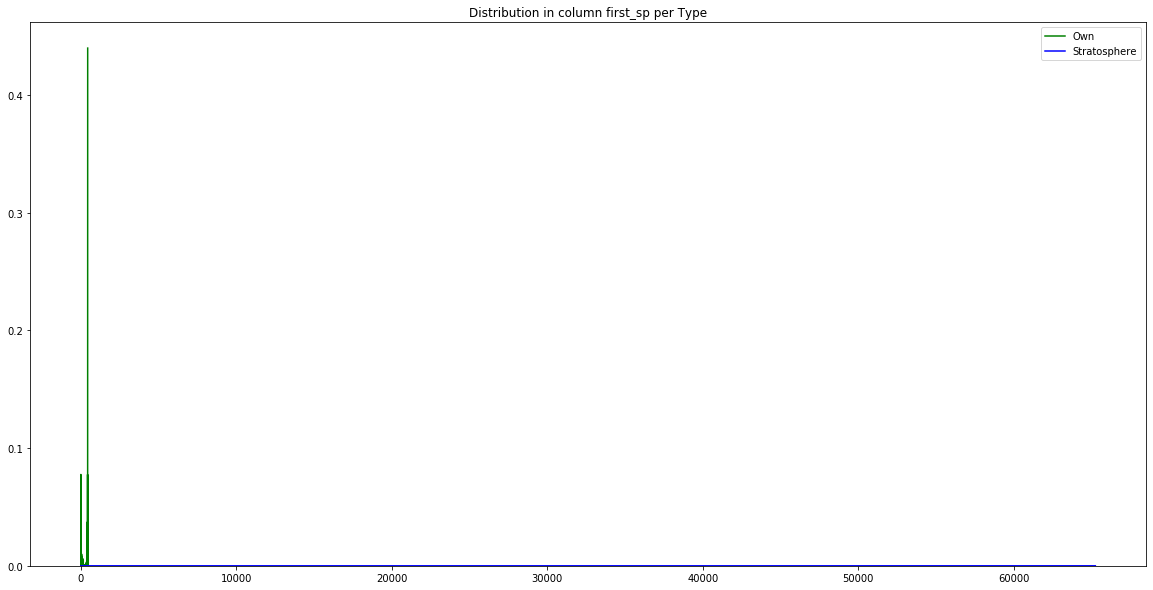

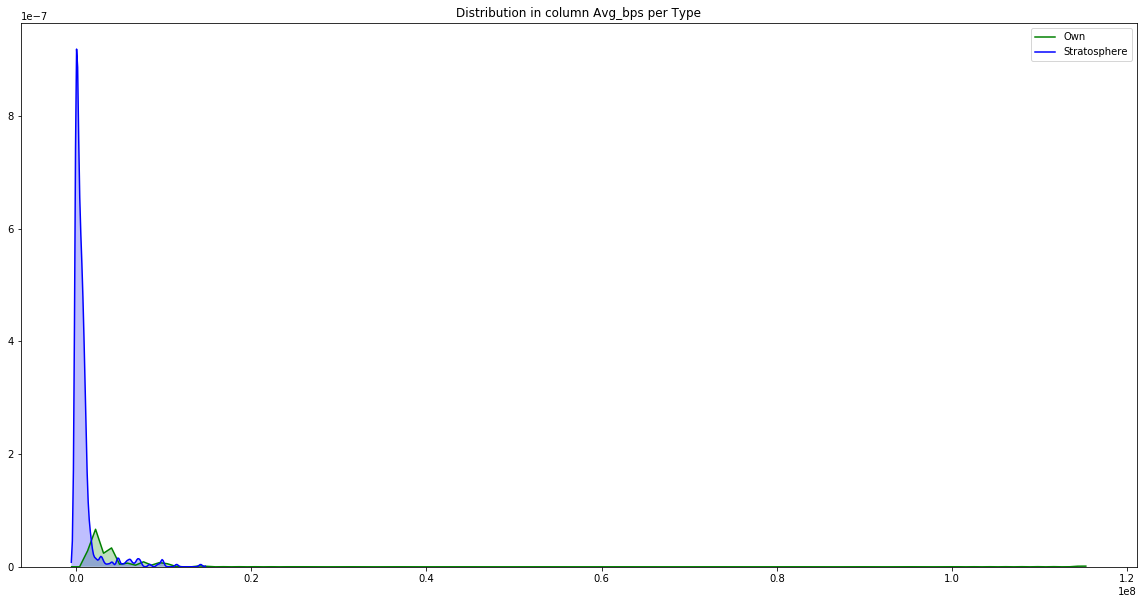

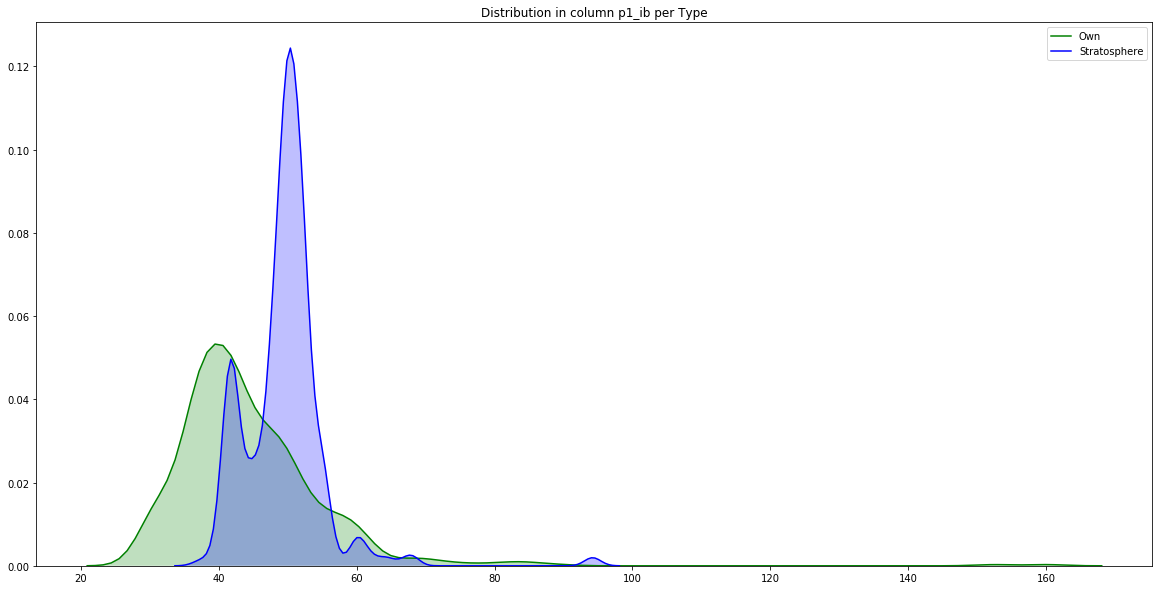

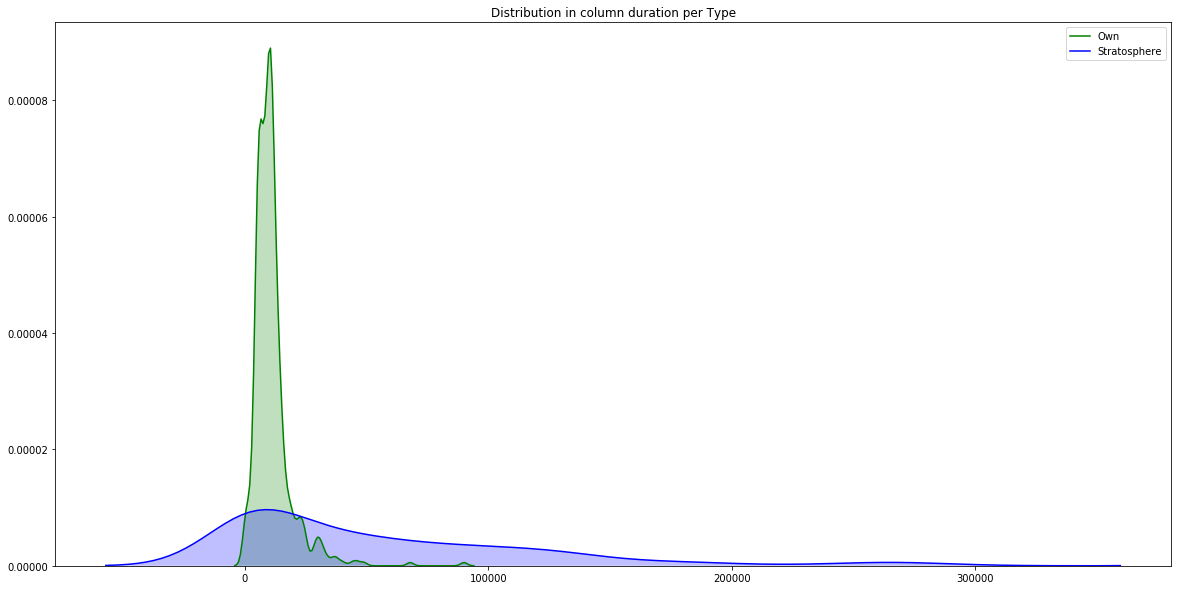

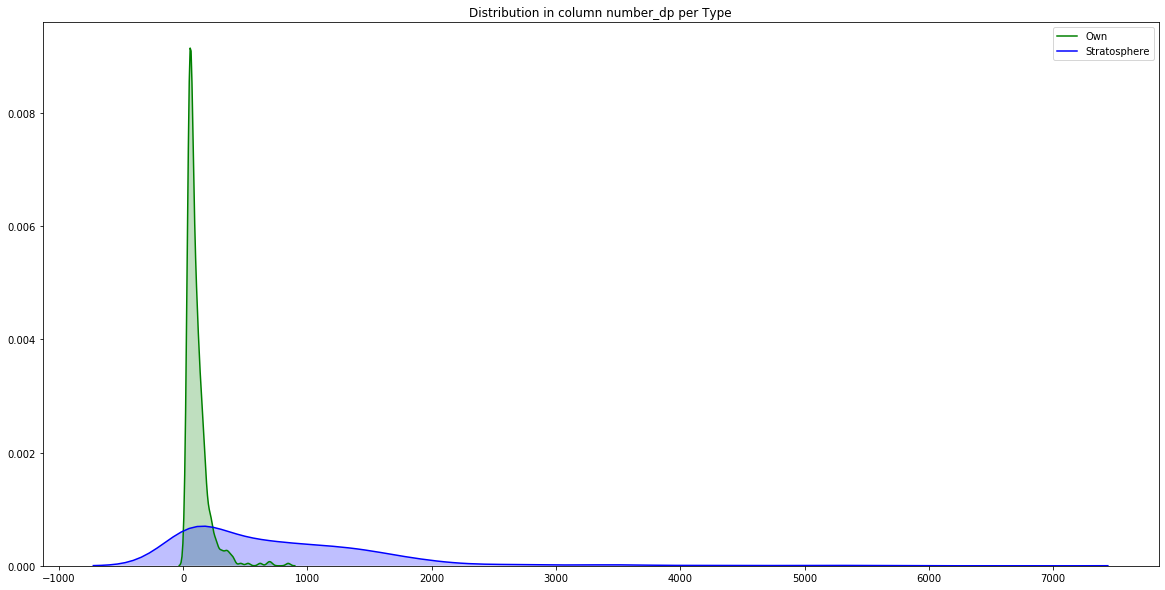

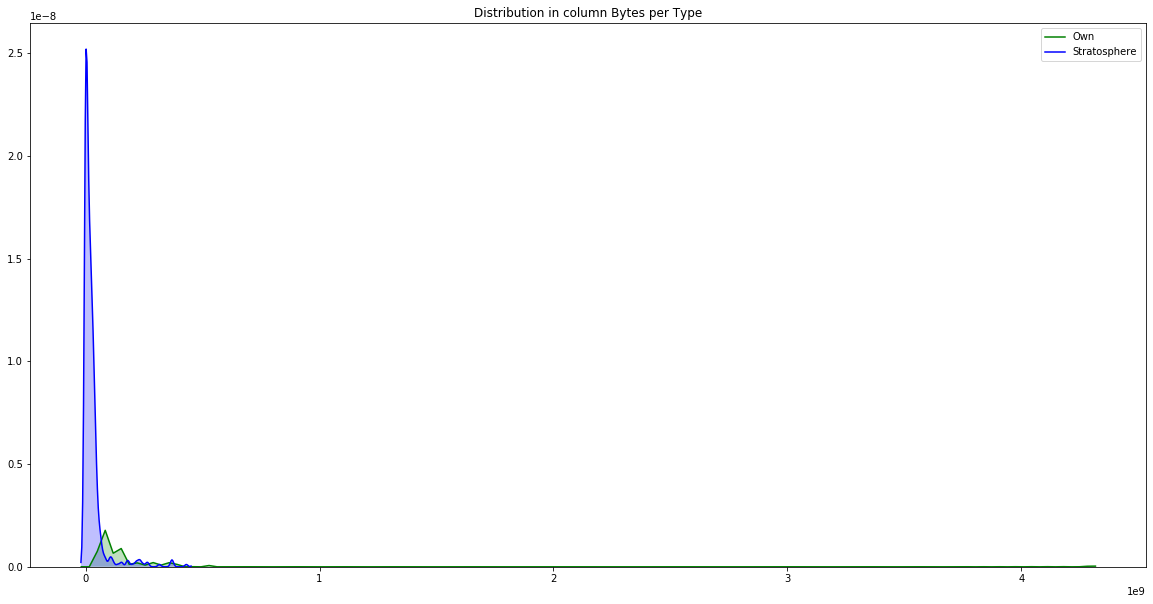

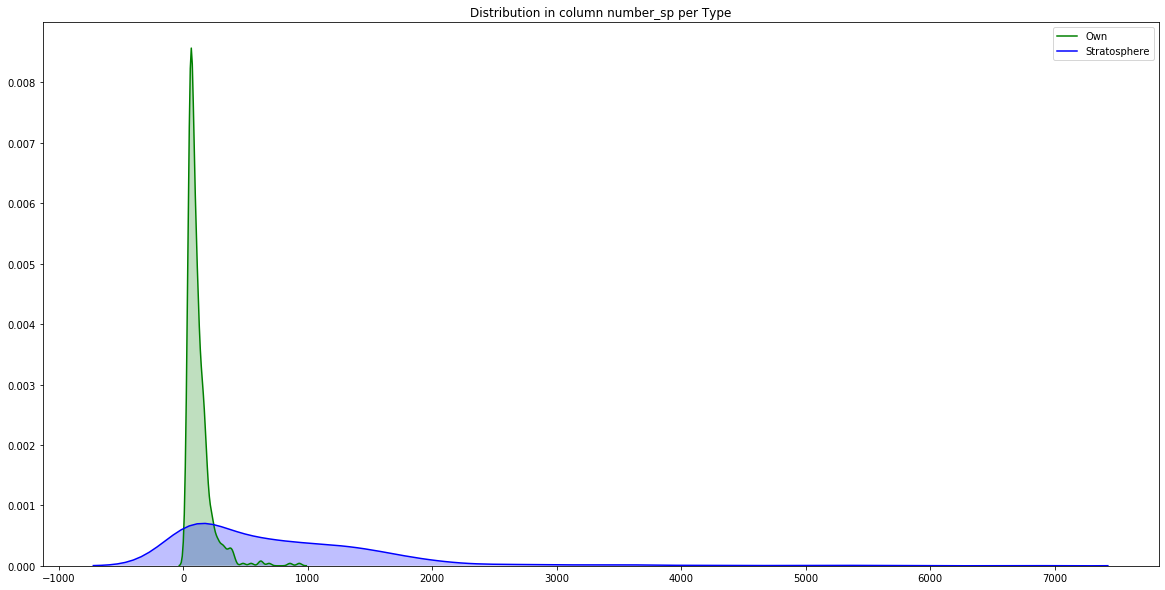

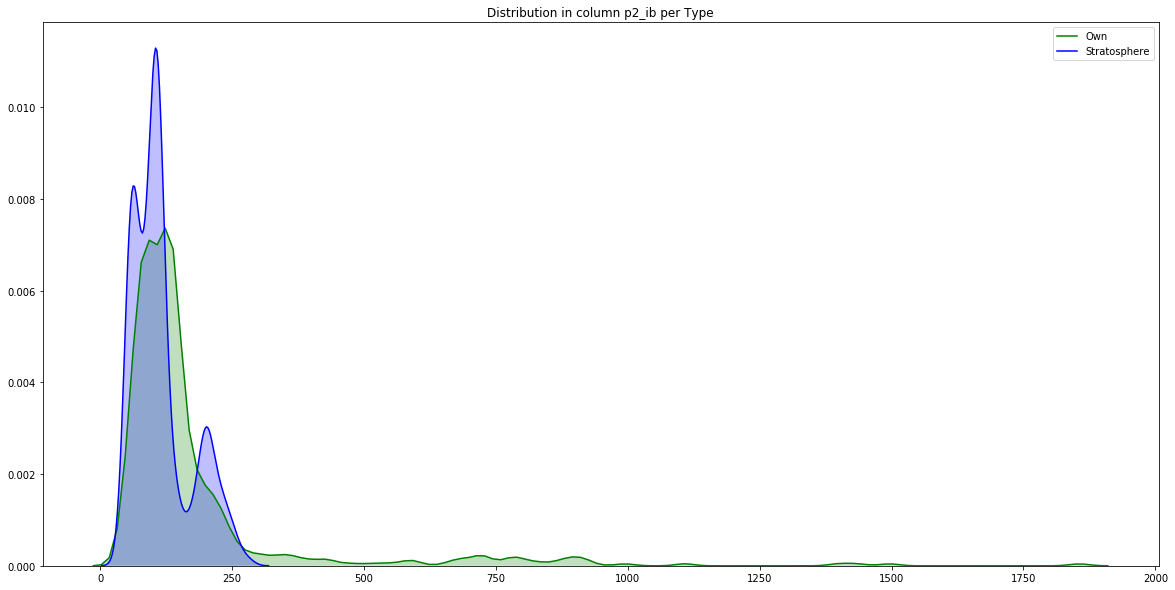

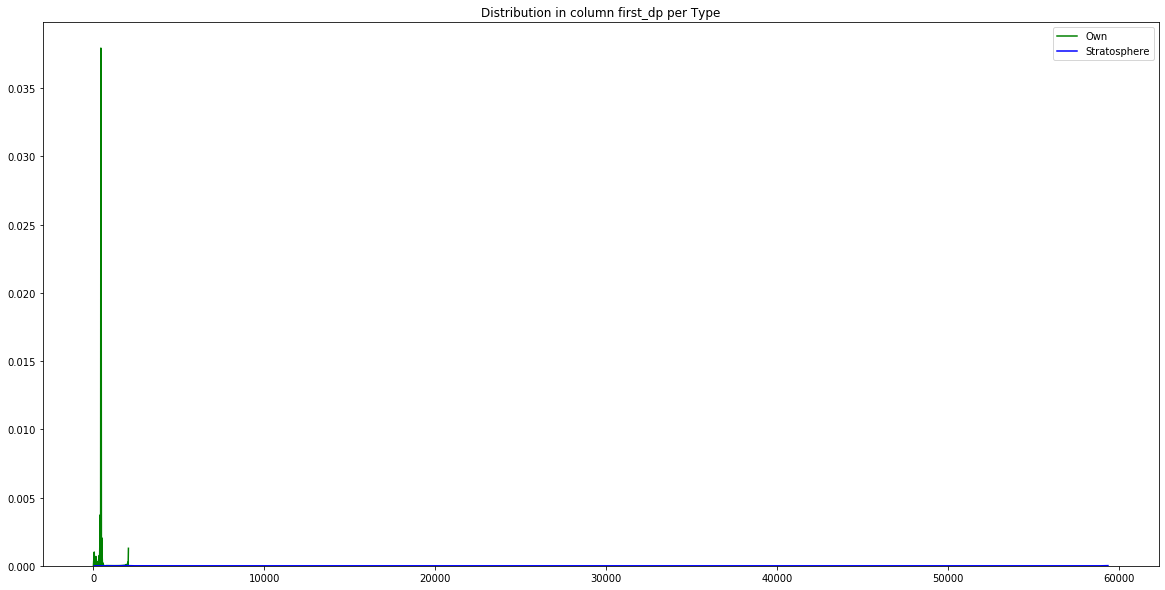

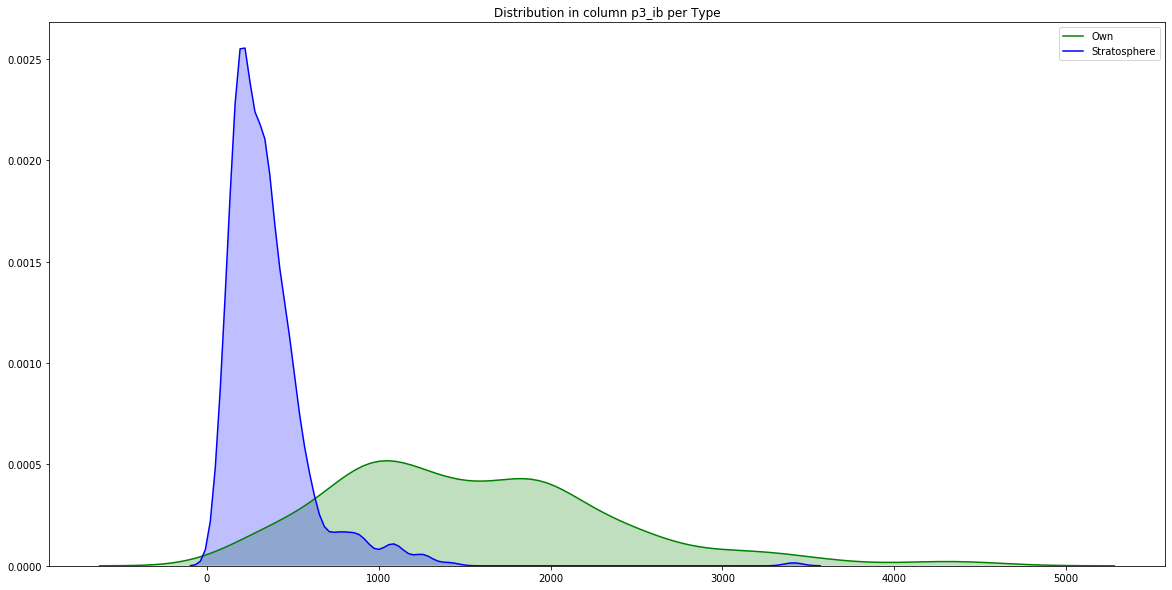

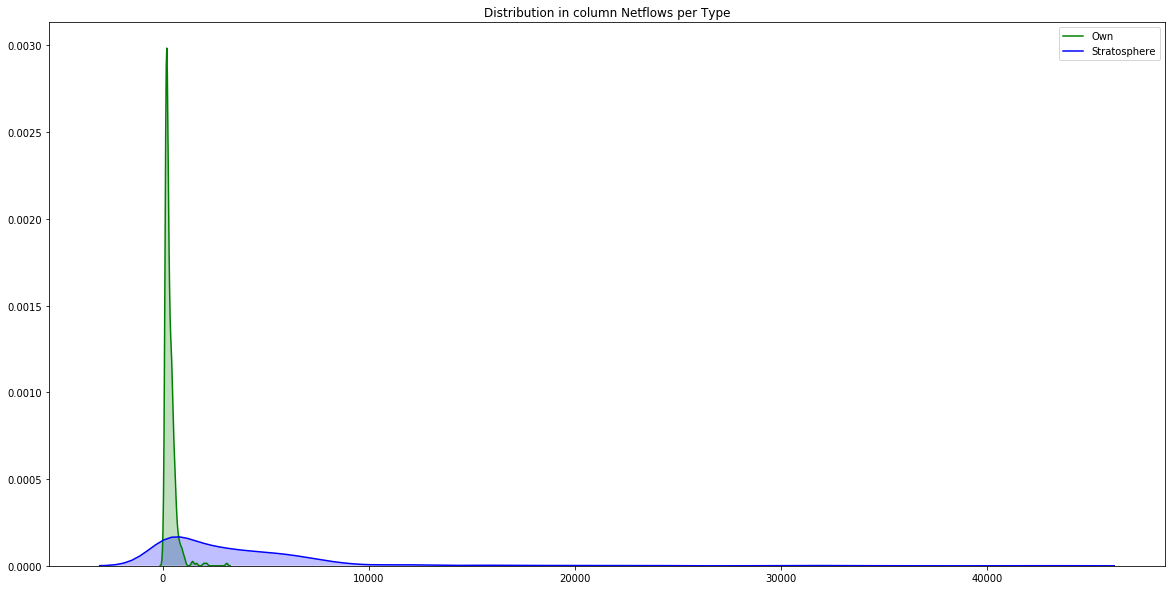

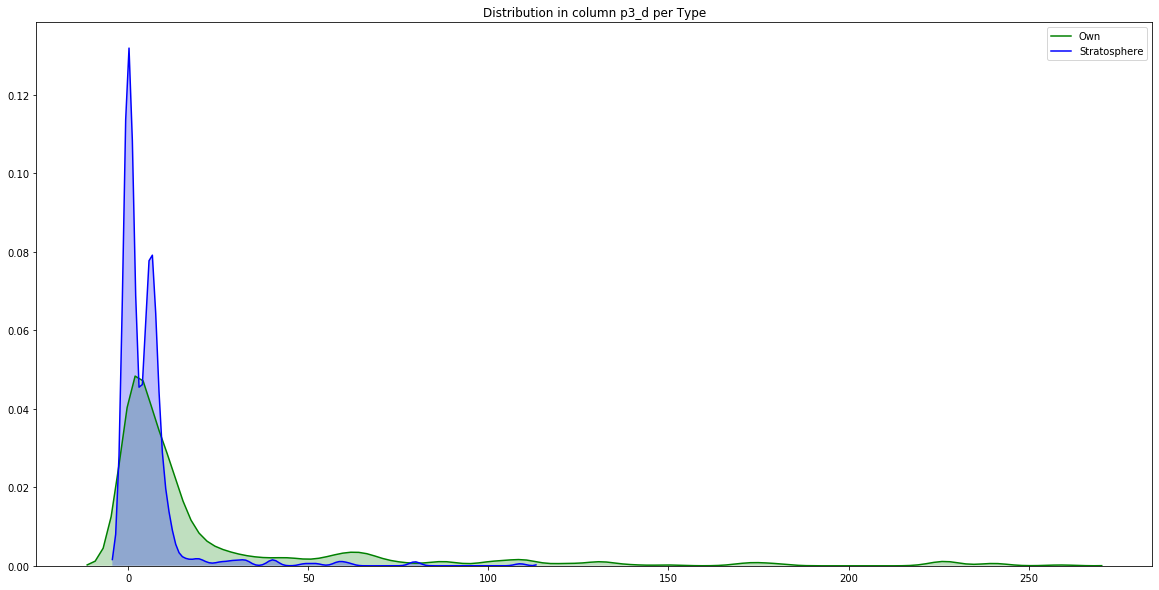

In [42]:
for column in full_dataset.columns:  
   if column not in invalid:
         fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
         ax1.set_title("Distribution in column %s per Type" %column)
         sns.kdeplot(full_dataset[full_dataset.Type == 0][column], color="green", shade=True)
         sns.kdeplot(full_dataset[full_dataset.Type == 1][column], color="blue", shade=True)
         plt.legend(['Own', 'Stratosphere'])

---

In [43]:
column = "First_Protocol"
temp =  full_dataset[[column,"Type"]]

In [44]:
le_name_mapping_type

{'Own': 0, 'Stratosphere': 1}

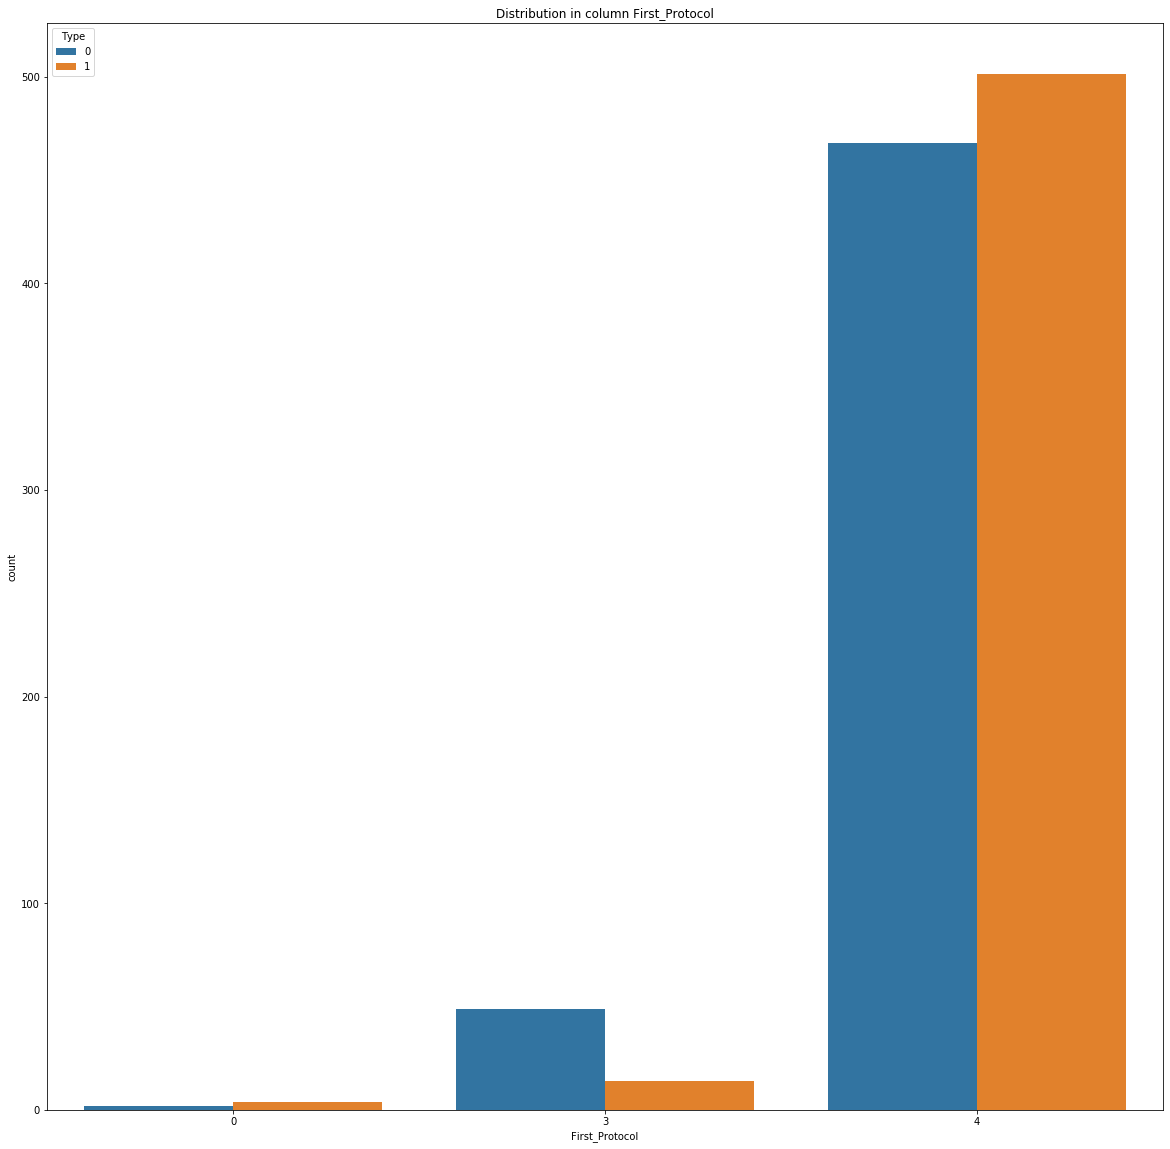

In [45]:
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,20))
ax1.set_title("Distribution in column %s" %column)
sns.countplot(x=column, hue="Type",data=full_dataset[[column,"Type"]])

In [46]:
le_name_mapping_first_protocol

{'ICMP': 0, 'ICMP6': 1, 'None': 2, 'TCP': 3, 'UDP': 4}

---

---

In [47]:
column = "Second_Protocol"
temp =  full_dataset[[column,"Type"]]

In [48]:
le_name_mapping_type

{'Own': 0, 'Stratosphere': 1}

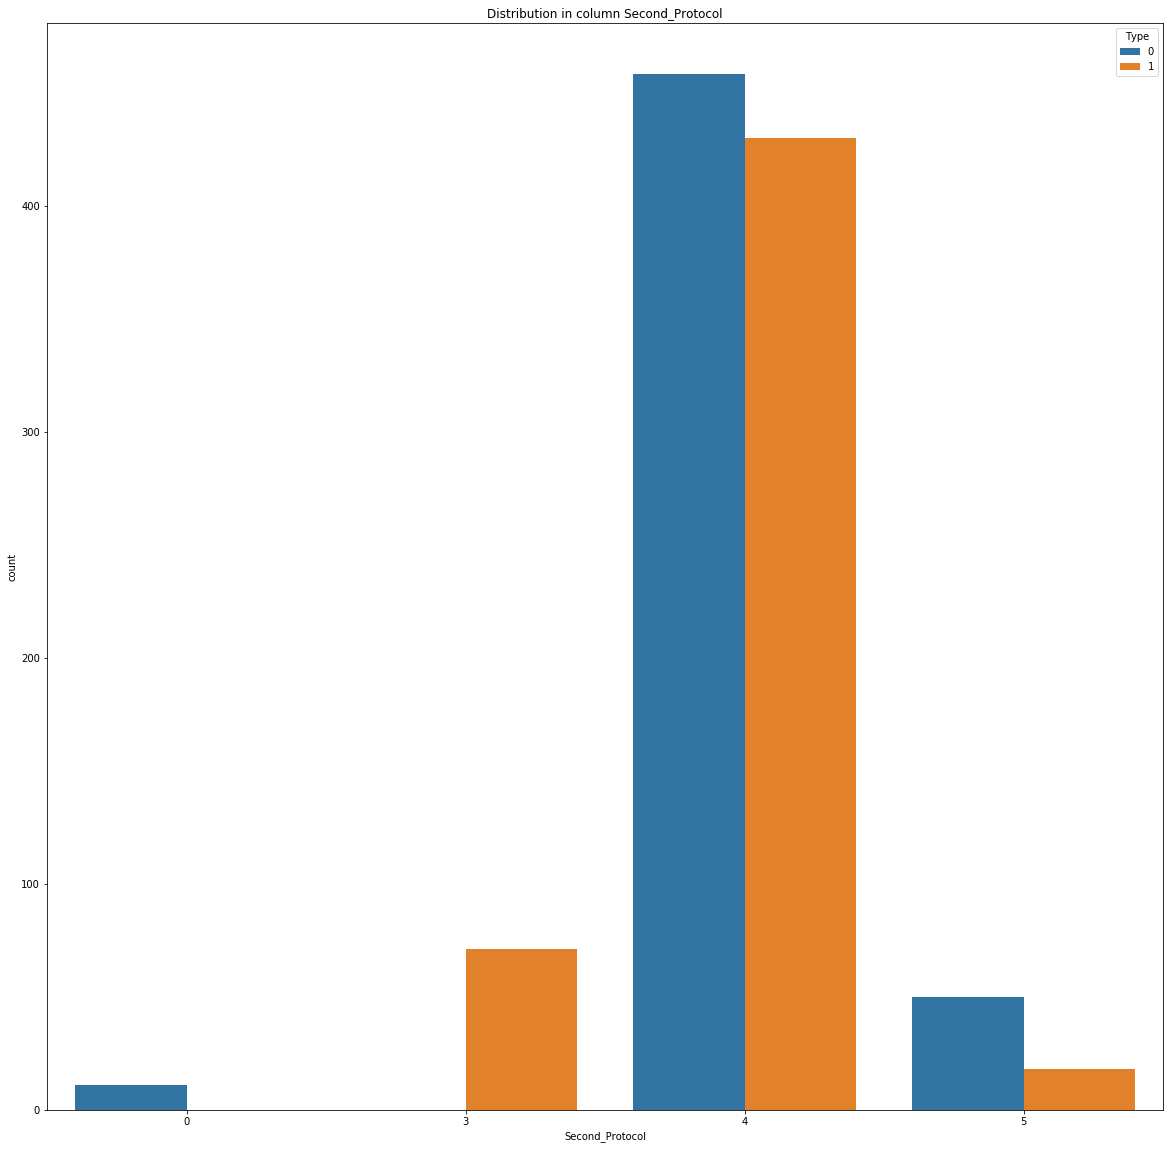

In [49]:
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,20))
ax1.set_title("Distribution in column %s" %column)
sns.countplot(x=column, hue="Type",data=full_dataset[[column,"Type"]])

In [50]:
le_name_mapping_second_protocol

{'ICMP': 0, 'ICMP6': 1, 'IGMP': 2, 'None': 3, 'TCP': 4, 'UDP': 5}

---